<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: darkslategray;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;"> Tarea 1 (EJERCICIO 7)
    
</h2>
</div>

In [40]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [68]:
# Generar datos
N = 1000
np.random.seed(123)

X1 = multivariate_normal.rvs(mean=mu1, cov=Sigma, size=N//3)
X2 = multivariate_normal.rvs(mean=mu2, cov=Sigma, size=N//3)
X3 = multivariate_normal.rvs(mean=mu3, cov=Sigma, size=N//3)
X = np.vstack([X1, X2, X3])
y = np.hstack([np.zeros(N//3), np.ones(N//3), 2*np.ones(N//3)])

# Clasificador Bayesiano
class BayesianClassifier:
    def __init__(self, means, covariances):
        self.means = means
        self.covariances = covariances
    
    def predict(self, X):
        likelihoods = [multivariate_normal.pdf(X, mean=mean, cov=cov) for mean, cov in zip(self.means, self.covariances)]
        return np.argmax(likelihoods, axis=0)

# Clasificador Euclidiano
class EuclideanClassifier:
    def __init__(self, means):
        self.means = means
    
    def predict(self, X):
        distances = [np.linalg.norm(X - mean, axis=1) for mean in self.means]
        return np.argmin(distances, axis=0)

# Clasificador de Mahalanobis
class MahalanobisClassifier:
    def __init__(self, means, covariances):
        self.means = means
        self.inverses = [np.linalg.inv(cov) for cov in covariances]
    
    def predict(self, X):
        distances = [np.sum((X - mean) @ inv * (X - mean), axis=1) for mean, inv in zip(self.means, self.inverses)]
        return np.argmin(distances, axis=0)

# Definir clasificadores
bayes_classifier = BayesianClassifier([mu1, mu2, mu3], [Sigma, Sigma, Sigma])
euclidean_classifier = EuclideanClassifier([mu1, mu2, mu3])
mahalanobis_classifier = MahalanobisClassifier([mu1, mu2, mu3], [Sigma, Sigma, Sigma])

# Predicciones
y_pred_bayes = bayes_classifier.predict(X)
y_pred_euclidean = euclidean_classifier.predict(X)
y_pred_mahalanobis = mahalanobis_classifier.predict(X)

# Calcular errores de clasificación
error_bayes = np.mean(y_pred_bayes != y)
error_euclidean = np.mean(y_pred_euclidean != y)
error_mahalanobis = np.mean(y_pred_mahalanobis != y)

Conjunto de datos D1

In [51]:
# Definir las medias y covarianzas para D1
mu1 = np.array([1, 1])
mu2 = np.array([12, 8])
mu3 = np.array([16, 1])
Sigma = 4 * np.eye(2)  # 4 veces la matriz identidad 2x2

In [53]:
print(f"Error de clasificación (Bayes): {error_bayes}")
print(f"Error de clasificación (Euclidiano): {error_euclidean}")
print(f"Error de clasificación (Mahalanobis): {error_mahalanobis}")

Error de clasificación (Bayes): 0.011011011011011011
Error de clasificación (Euclidiano): 0.011011011011011011
Error de clasificación (Mahalanobis): 0.011011011011011011


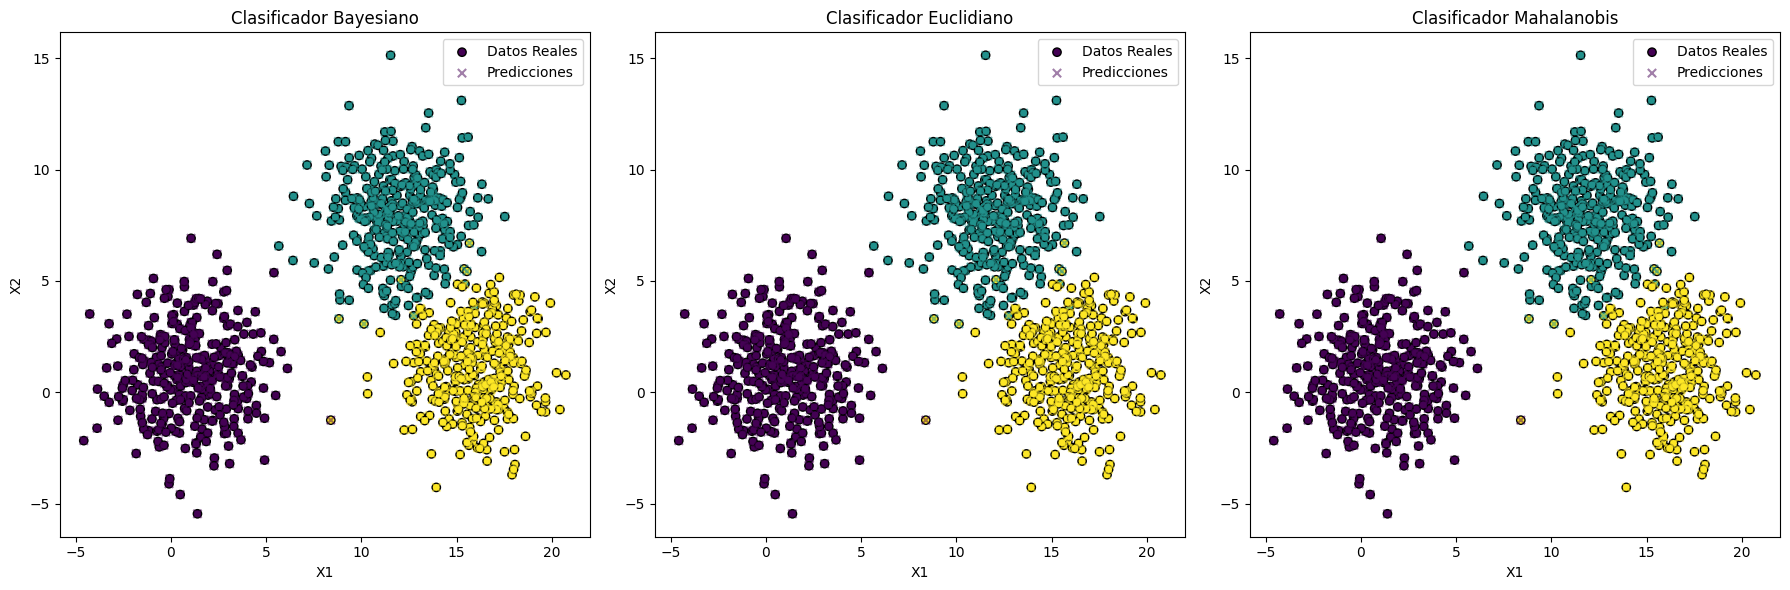

In [54]:
# Graficar los datos y las predicciones
def plot_data(ax, X, y, y_pred, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Datos Reales')
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicciones', alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_data(axs[0], X, y, y_pred_bayes, 'Clasificador Bayesiano')
plot_data(axs[1], X, y, y_pred_euclidean, 'Clasificador Euclidiano')
plot_data(axs[2], X, y, y_pred_mahalanobis, 'Clasificador Mahalanobis')

plt.tight_layout()
plt.show()

Conclusiones de los resultados:

- Los tres clasificadores tienen errores de clasificación similares y bajos.
- Las tres clases están bien separadas en el espacio de características, lo que facilita la tarea de clasificación.
- Dado que las covarianzas son iguales y las clases están bien separadas, no hay mucha diferencia en el rendimiento de los clasificadores.

Conjunto de datos D2

In [55]:
# Definir las medias y covarianzas para D2
mu1 = np.array([1, 1])
mu2 = np.array([14, 7])
mu3 = np.array([16, 1])
Sigma = np.array([[5, 3], [3, 4]])

In [57]:
print(f"Error de clasificación (Bayes): {error_bayes}")
print(f"Error de clasificación (Euclidiano): {error_euclidean}")
print(f"Error de clasificación (Mahalanobis): {error_mahalanobis}")

Error de clasificación (Bayes): 0.002002002002002002
Error de clasificación (Euclidiano): 0.009009009009009009
Error de clasificación (Mahalanobis): 0.002002002002002002


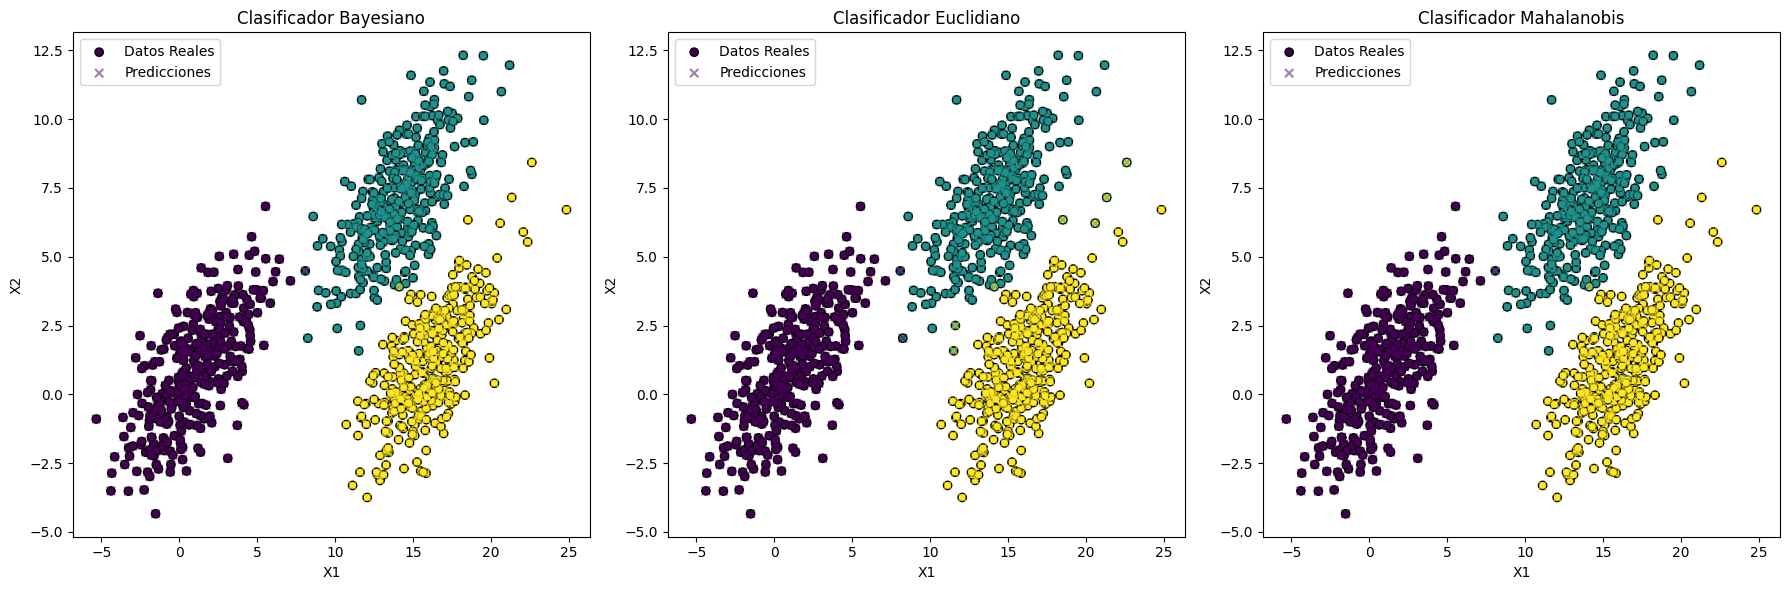

In [58]:
# Graficar los datos y las predicciones
def plot_data(ax, X, y, y_pred, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Datos Reales')
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicciones', alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_data(axs[0], X, y, y_pred_bayes, 'Clasificador Bayesiano')
plot_data(axs[1], X, y, y_pred_euclidean, 'Clasificador Euclidiano')
plot_data(axs[2], X, y, y_pred_mahalanobis, 'Clasificador Mahalanobis')

plt.tight_layout()
plt.show()

Conclusiones de los resultados:

- Los clasificadores Bayesiano y Mahalanobis tienen un rendimiento superior al clasificador Euclidiano en este caso porque se podria consideran tanto las medias como las covarianzas de las clases que se pueden manejar diferencias en las formas de las distribuciones de las clases y hacen uso de la información completa de las distribuciones de las clases, lo que lleva a clasificaciones más precisas.

- El clasificador Euclidiano, al no considerar la covarianza, es menos efectivo cuando las clases tienen formas y dispersión diferentes, lo que resulta en un mayor error de clasificación.

Conjunto de datos D3

In [63]:
# Definir las medias y covarianzas para D3
mu1 = np.array([1, 1])
mu2 = np.array([8, 6])
mu3 = np.array([13, 1])
Sigma = 6 * np.eye(2)

In [65]:
print(f"Error de clasificación (Bayes): {error_bayes}")
print(f"Error de clasificación (Euclidiano): {error_euclidean}")
print(f"Error de clasificación (Mahalanobis): {error_mahalanobis}")

Error de clasificación (Bayes): 0.07207207207207207
Error de clasificación (Euclidiano): 0.07207207207207207
Error de clasificación (Mahalanobis): 0.07207207207207207


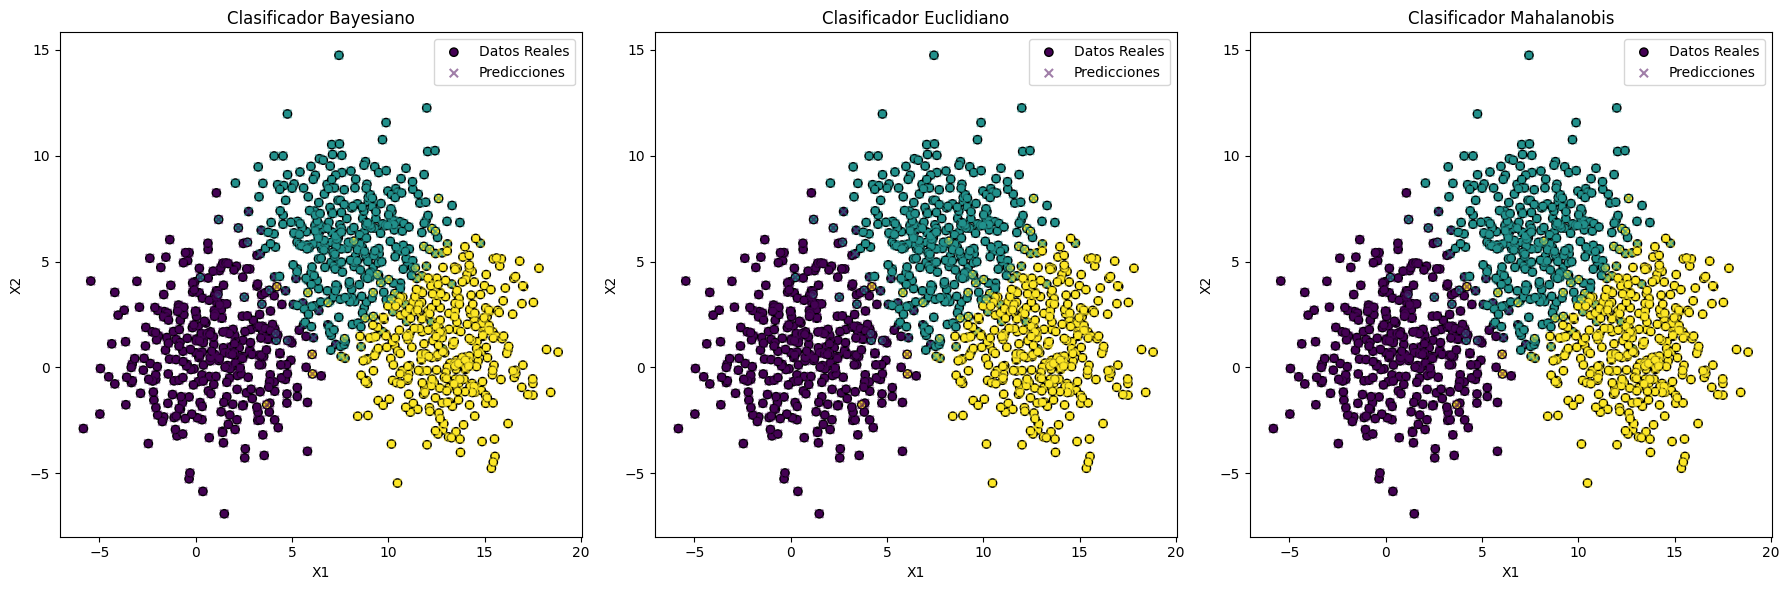

In [66]:
# Graficar los datos y las predicciones
def plot_data(ax, X, y, y_pred, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Datos Reales')
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicciones', alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_data(axs[0], X, y, y_pred_bayes, 'Clasificador Bayesiano')
plot_data(axs[1], X, y, y_pred_euclidean, 'Clasificador Euclidiano')
plot_data(axs[2], X, y, y_pred_mahalanobis, 'Clasificador Mahalanobis')

plt.tight_layout()
plt.show()

Conclusiones de los resultados:

- Los tres clasificadores tienen un error de clasificación idéntico.
- Las clases están más dispersas debido a la mayor covarianza, lo que aumenta la dificultad de clasificación.
- La similitu
d en el error sugiere que los clasificadores se ven igualmente afectados por la dispersión aumentada de las clases.

Conjunto de datos D4

In [71]:
# Definir las medias y covarianzas para D4
mu1 = np.array([1, 1])
mu2 = np.array([10, 5])
mu3 = np.array([11, 1])
Sigma = np.array([[7, 4], [4, 5]])

In [69]:
print(f"Error de clasificación (Bayes): {error_bayes}")
print(f"Error de clasificación (Euclidiano): {error_euclidean}")
print(f"Error de clasificación (Mahalanobis): {error_mahalanobis}")

Error de clasificación (Bayes): 0.08508508508508508
Error de clasificación (Euclidiano): 0.12212212212212212
Error de clasificación (Mahalanobis): 0.08508508508508508


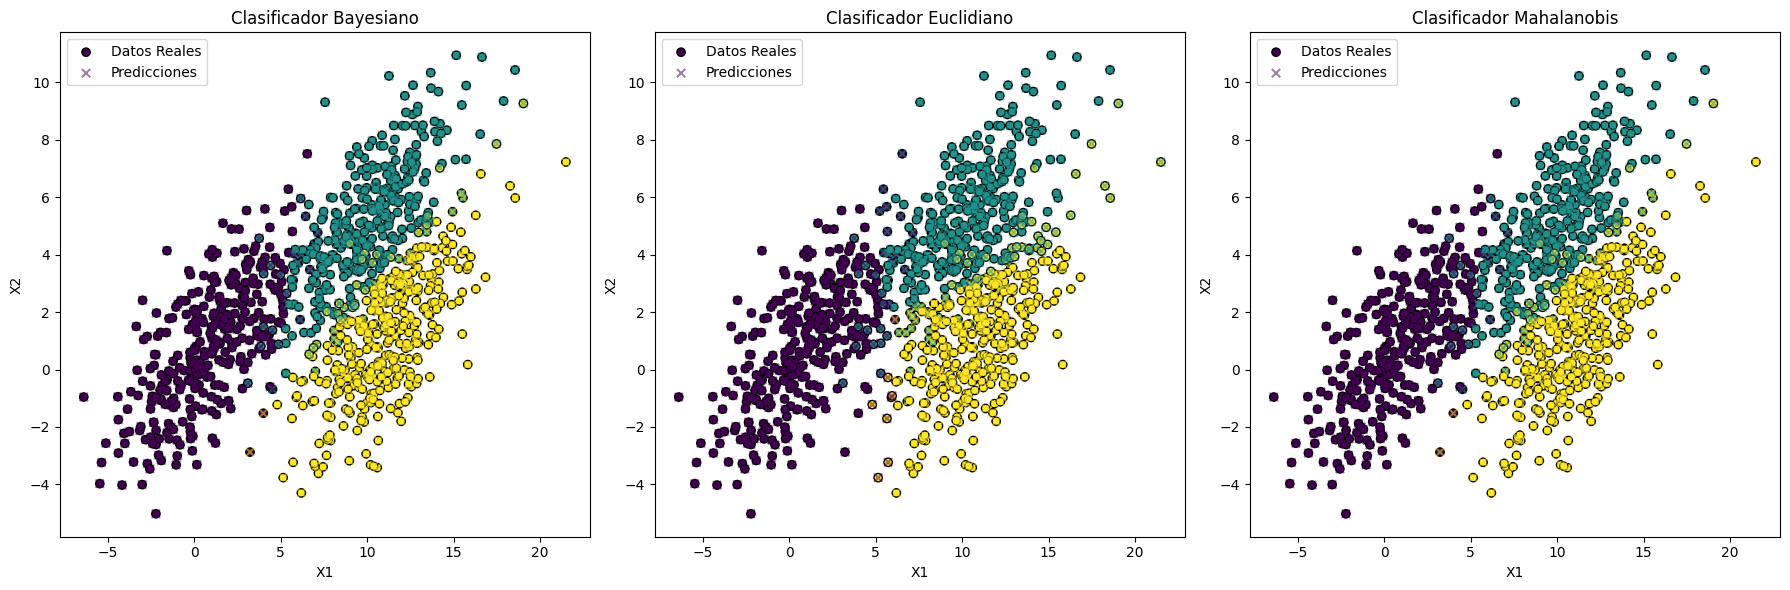

In [70]:
# Graficar los datos y las predicciones
def plot_data(ax, X, y, y_pred, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Datos Reales')
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicciones', alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_data(axs[0], X, y, y_pred_bayes, 'Clasificador Bayesiano')
plot_data(axs[1], X, y, y_pred_euclidean, 'Clasificador Euclidiano')
plot_data(axs[2], X, y, y_pred_mahalanobis, 'Clasificador Mahalanobis')

plt.tight_layout()
plt.show()

Conclusiones de resultados:

- El clasificador Bayesiano y el Mahalanobis tienen un rendimiento significativamente mejor que el Euclidiano.
- Las diferencias en las covarianzas y la posición de las medias tienen un mayor impacto en el clasificador Euclidiano, que no maneja bien la forma de las distribuciones de las clases.

<center>
<div style="color:;
           display:fill;
           border-radius:1px;
           background-color: darkcyan;
           font-size:110%;
           letter-spacing:0.3px">

<h2 style="padding: 10px;
              color:snow;"> Conclusión

</h2>
</div>

1) Clasificador Bayesiano:
   
- Consistentemente proporciona un rendimiento robusto y preciso, especialmente cuando las covarianzas de las clases son diferentes.
- Su capacidad para manejar la información de la forma de las distribuciones lo hace muy efectivo en una variedad de escenarios.
  
2) Clasificador Euclidiano:

- Funciona bien cuando las clases están bien separadas y tienen formas similares.
- Su rendimiento disminuye significativamente cuando las clases tienen diferentes covarianzas o están más dispersas.

3) Clasificador Mahalanobis:

- Similar al clasificador Bayesiano en términos de rendimiento y robustez.
- Su uso de la información de covarianza lo hace eficaz en escenarios donde las clases tienen diferentes distribuciones.
  
Por lo tanto, los clasificadores que utilizan información sobre la forma de las distribuciones (Bayesiano y Mahalanobis) tienden a ser más robustos y precisos en una variedad de escenarios, mientras que el clasificador Euclidiano es más simple pero menos efectivo cuando las clases no son equidistantes o tienen diferentes formas de distribución.